<font color="#de3023"><h1><b>REMINDER: MAKE A COPY OF THIS NOTEBOOK, DO NOT EDIT</b></h1></font>

To copy the notebook, go to File and click create "Save a copy to ..." and work on that copy.

Please submit a pdf of the page of your notebook (Ctrl + p on the page, save as pdf, and submit that pdf) on gradescope.

Please remember to assign pages to the appropriate questions. Not doing so will result in the deduction of points. Please submit a **pdf** version of the colab notebook.

# **Homework 3: Gradient Descent**

# Basic Import Statements
Feel free to import as you need

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# If need be, you can add more import statements

# Loading regression Data
<font color="#de3023"><h6><b>DO NOT MAKE EDITS TO THIS SECTION</b></h6></font>
We will be using the same California Housing Data for Question 1.

In [116]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


california_housing = fetch_california_housing( return_X_y=True, as_frame=True)
X = california_housing[0]
y = california_housing[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# np.random.seed(42)
sc=StandardScaler()
X_transform=sc.fit_transform(X_train)

## Question 0 Part (a)
Do you have confusions or questions about the previous lectures?  (This is optional to answer)

(Answer here)

## Question 0 Part (b)
Any suggestions or thoughts about the course? (This is optional to answer)

I have suggestion that maybe the hw due date can be delayed to wednesday night or before thursday night every week?

I suggest this because we get the hw on saturday (for hw3 at least), but we learn the tool needed to do hw on thursday lab, and then needed to submit it by monday night.

This is just my suggestion, I apologize if I went overboard.

## Question 1: Gradient Descent for OLS

### Part 1 - Simple Linear Regression (20 points)

Remember that in the simple linear regression we want to find $(\alpha, \beta)$ that minimize the sum of the square of the errors:

$$(\widehat{\alpha}, \widehat{\beta}) = argmin_{(\alpha, \beta)} L(\alpha, \beta) = argmin_{(\alpha, \beta)} \frac{1}{2n}\sum_{i=1}^n (y_i - \alpha - \beta x_i)^2$$

We can approximate the solution of the simple linear regression using gradient descent in the following way:


**Inputs:** $X, Y,\alpha_0, \beta_0, \eta, \epsilon$

**Setp 1:** For $k =0$, initialize $\alpha_k$ and $\beta_k$:

$$\alpha_k = \alpha_0$$
$$\beta_k = \beta_0$$

**Step 2:** For $k \geq 1$ repeat until $|\alpha_k - \alpha_{k-1}| + |\beta_k - \beta_{k-1}| < \epsilon$:

- **Step 2 a):** Update $\alpha_k$ and $\beta_k$ according to the rule:

$$\alpha_k = \alpha_{k-1} - \eta \frac{dL}{d\alpha} = \alpha_{k-1} (1-\eta) + \frac{\eta}{n}\sum_{i=1}^n y_i - \beta_{k-1}\frac{\eta}{n}\sum_{i=1}^n x_i$$

$$\beta_k = \beta_{k-1} - \eta \frac{dL}{d\beta} = \beta_{k-1} + \frac{\eta}{n}\sum_{i=1}^n x_i y_i - \alpha_{k-1}\frac{\eta}{n}\sum_{i=1}^n x_i - \beta_{k-1}\frac{\eta}{n}\sum_{i=1}^n x_i^2$$

or in vector notation

$$(\alpha_k, \beta_k) = (\alpha_{k-1}, \beta_{k-1}) - \eta \nabla L $$

- **Step 2 b):** Calculate and store loss of current interation:
$$L_k = \frac{1}{2n}\sum_{i=1}^n (y_i - \alpha_k - \beta_k x_i)^2$$

**Step 3:** Plot the training loss across all iterations $(L_0, L_1,...)$

**Output:** $(\alpha_k, \beta_k)$, $L_k$

Write an algorithm for gradient descent which will output  $(\widehat{\alpha}, \widehat{\beta})$  and the training loss of the model using  $(\widehat{\alpha}, \widehat{\beta})$  with a given  $X$  vector with dimensions  $nx1$ ,  $Y$  vector with dimensions  $nx1$ ,  $\eta$  learning rate,  $(\alpha_0,\beta_0)$  initailization for  $(\widehat{\alpha}, \widehat{\beta})$, and  $\epsilon$  convergence condition. This algorithm should also plot the losses across all iterations.

There are two ways to define a convergence condition for gradient descent:

*   check if the changes made to $\alpha_k$ and $\beta_k$ are smaller than epsilon.

$$|\alpha_k - \alpha_{k-1}| + |\beta_k - \beta_{k-1}| < \epsilon$$

*   check if the change made to the loss is smaller than epsilon.

$$|L_k - L_{k-1}| < \epsilon$$

You can implement either for the rest of HW3.

Implement this using one loop for full credit.

In [117]:
#############################################################################
# [Question 1 Part 1: 20 points]                                            #
# TODO:                                                                     #
# Implement Gradient Descent for Simple Linear Regression using the gradient#
# formula shown above.                                                      #
# Input: X of shape (n,), y of shape (n,), eta,                             #
#        initial_w of shape ((p + 1), ), epsilon                            #
# Output: alpha, beta and Training loss using those values.                 #
# Also plot your losses across all iterations                               #
# ONLY use numpy for this section! Use of scikit-learn will give you 0 points
#############################################################################

def simp_lin_grad_descent(X, y, eta, initial_alpha, initial_beta, epsilon):
  #############################################################################
  #                              START OF YOUR CODE                           #
  #############################################################################
  n = X.shape[0]
  alpha_1, beta_1 = initial_alpha, initial_beta
  old_alpha, old_beta = alpha_1, beta_1
  diff = 100
  losses = []
  i = 0
  frac = eta/n
  # Replace "..." statement with your code for the iterative w update
  while diff > epsilon:
      alpha_1 = old_alpha*(1-eta) + frac* np.sum(y) - old_beta * frac *np.sum(X)
      beta_1 = old_beta + frac * np.sum(X * y) - old_alpha*frac*np.sum(X) - old_beta * frac * np.sum(X**2)
      loss = (1/(2*n)) * np.sum((y-alpha_1-beta_1 * X)**2)
      losses.append(loss)
      if i > 0:
        diff = (abs(alpha_1-old_alpha - abs(beta_1 - old_beta)))
      i = i + 1
      old_alpha = alpha_1
      old_beta = beta_1
  # Insert Code for plots here
  plt.plot(range(1, len(losses) + 1), losses, label = "loss")
  plt.legend()
  plt.xlabel("iteration")
  plt.ylabel("Losses")
  plt.show()
  return alpha_1, beta_1, losses[-1]

### Test cases
<font color="#de3023"><h6><b>DO NOT MAKE EDITS TO THIS SECTION</b></h6></font>

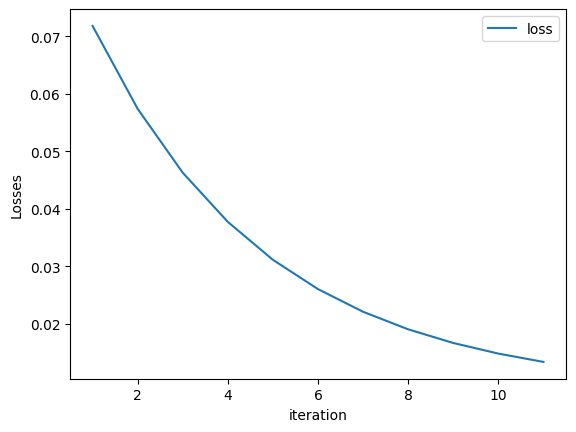

The training loss is 0.013363189353451302
The weights are [0.22800829280006615, 0.16016804795056042]


In [118]:
np.random.seed(42)
x = np.random.rand(100)
alpha = np.random.rand(1)
beta = np.random.rand(1)
y_ = alpha + x * beta + np.random.rand(100)/10

eta, initial_alpha, initial_beta, epsilon = 0.1, 0, 0, 0.001
alpha_hat, beta_hat, loss = simp_lin_grad_descent(x, y_, eta, initial_alpha, initial_beta, epsilon)

print("The training loss is {}".format(loss))
print("The weights are {}".format([alpha_hat, beta_hat]))

### Part 2 - Batch Gradient Descent (40 points)
We implemented Gradient Descent for simple linear regression but what about multiple linear regression?

In general, we can apply gradient descent algorithm in the following way:

$$w_k = w_{k-1} - \eta \nabla L $$

Where $w$ is the weight vector of the model, $\eta$ is the learning rate, $L$ is the loss function and $\nabla L$ is the corresponding gradient.

In particular, for multiple linear regression we have:

$$L(w) = \frac{1}{2n}\sum_{i=1}^n (y_i - x_i^T w)^2 = \frac{1}{2n}||Y - X w||^2$$

$$\nabla L = \frac{1}{n} X^T(Xw - Y)$$

So the gradient descent for  multiple linear regression would be

**Inputs:** $X, Y,\alpha_0, \beta_0, \eta, \epsilon$

**Step 1:** For $k=0$ initialize $w_k$

$$w_k = w_0$$

**Step 2:** For  $k\geq 1$  repeat until $||w_k - w_{k-1}|| < \epsilon$:

- **Step 2 a) :** Update the weight vector $w_k$ according to the rule:
$$w_k = w_{k-1} - \eta \frac{1}{n} X^T(Xw_{k-1} - Y) $$

- **Step 2 b):** Calculate and store loss of current interation:
$$L_k = \frac{1}{2n}||Y - X w_k||^2$$

**Step 3:** Plot the training loss across all iterations $(L_0, L_1,...)$

**Output:** $w_k$, $L_k$

Write an algorithm for gradient descent which will output $\widehat{w}$ and the training loss of the model using $\widehat{w}$ with a given $X$ matrix with dimensions $n \times p$, $Y$ vector with dimensions $n \times 1$, $\eta$ learning rate, $w_0$ initailization for $w$, and $\epsilon$ convergence condition. This algorithm should also plot the losses across all iterations.

There are two ways to define a convergence condition for gradient descent:

*   check if the changes made to $\alpha_k$ and $\beta_k$ are smaller than epsilon.

$$||w_k - w_{k-1}|| < \epsilon$$

*   check if the change made to the loss is smaller than epsilon.

$$|L_k - L_{k-1}| < \epsilon$$

You can implement either for the rest of HW3.

Implement this using one loop for full credit.

In [119]:
#############################################################################
# [Question 1 Part 2: 40 points]                                            #
# TODO:                                                                     #
# Implement Gradient Descent for Linear Regression using the gradient.      #
# formula derived in class.                                                 #
# Input: X of shape (n, p), y of shape (n,), eta,                           #
#        initial_w of shape ((p + 1), ), epsilon                            #
# Output: w of shape ((p + 1), ) and Training loss using that weight.       #
# Also plot your losses across all iterations                               #
# ONLY use numpy for this section! Use of scikit-learn will give you 0 points
#############################################################################

def lin_grad_descent(X, y, eta, initial_w, epsilon):
  #############################################################################
  #                              START OF YOUR CODE                           #
  #############################################################################
  # given
  n, p = X.shape
  ones = np.ones((n, 1))
  new_X = np.hstack((ones, X))
  new_y = np.array(y).reshape((n, 1))
  # made
  losses = []
  differ = 1000
  weight_w = initial_w
  old_w = weight_w
  k = 0
  frac = eta/n
  # print(new_X.shape)
  # print(new_y.shape)
  # print(old_w.shape)
  # Replace "..." statement with your code
  while differ > epsilon:
    Xw = np.dot(new_X, old_w)
    weight_w = old_w - frac * new_X.T @ (Xw - new_y)
    loss = (1/(2*n)) * np.sum((new_y - np.dot(new_X, weight_w)) ** 2)
    losses.append(loss)
    if k > 0:
      new_l = losses[-1]
      old_l = losses[-2]
      # print(new_l,old_l)
      differ = abs(new_l - old_l)
      # print(differ)
    k = k + 1
    old_w = weight_w

  # Insert Code for plots here
  plt.plot(range(1, len(losses)+1), losses, label = "loss")
  plt.legend()
  plt.xlabel("iteration")
  plt.ylabel("Losses")
  plt.show()
  return weight_w, losses[-1]
  #############################################################################
  #                              END OF YOUR CODE                             #
  #############################################################################

### Test cases
<font color="#de3023"><h6><b>DO NOT MAKE EDITS TO THIS SECTION</b></h6></font>

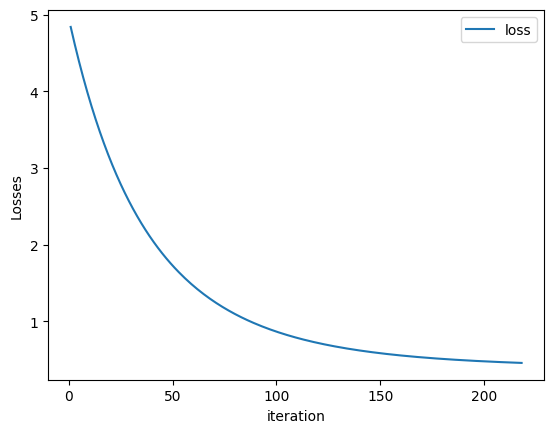

The training loss is 0.458691875980606
The test loss is 0.8819235775196219
The weights are [[ 1.89341887]
 [ 0.40452027]
 [ 0.27985972]
 [ 0.82454783]
 [-0.73535075]
 [ 0.02953445]
 [ 0.14358383]
 [-0.10884198]
 [-0.02221658]]


In [120]:
np.random.seed(42)
new_p = X.shape[1] + 1
w_graddescent , loss = lin_grad_descent(X_transform, y_train, eta = 0.01, initial_w =np.random.randn(new_p,1), epsilon = 0.001)
pred_y_test = np.hstack((np.ones((X_test.shape[0], 1)), sc.transform(X_test))) @ w_graddescent
new_y = np.array(y_test).reshape((y_test.shape[0], 1))
print("The training loss is {}".format(loss))
print("The test loss is {}".format(np.mean(np.square(new_y-pred_y_test))))
print("The weights are {}".format(w_graddescent))

### Part 3 - Mini batch gradient descent (40 points)

In the mini batch gradient descent, we apply gradient descent to a subset of the data that we call Batch with size $|B|$ at each iteration. The pseudo code is the following:

**Inputs:** $X, Y,\alpha_0, \beta_0, \eta, \epsilon, |B|$

Step 0: set n  = number of rows in $X$ and calculate the number of batches as $m = n/|B|$ (if $n$ is not divisible by |B|, take the smallest integer greater than or equal to $n/|B|$)

**Step 1:** For $k=0$ initialize $w_k$

$$w_k = w_0$$

**Step 2:** Repeat until $||w_k - w_{k-1}|| < \epsilon$:

- **Step 2 a):** Split the data randomly into $m$ batches: $B_1,B_2,...,B_{m}$. For each batch, we will have the corresponding $X_{B_1}, X_{B_2},...,X_{B_m}$ and $Y_{B_1}, Y_{B_2},...,Y_{B_m}$.

- **Step 2 b):** For each batch $j$ in $\{1,2,...,m\}$ apply gradient descent:

  - **Step 2 b.1):** Update the weight vector $w_k$ according to the rule:
      
      $$w_k = w_{k-1} - \eta \frac{1}{|B|} X_{B_j}^T(X_{B_j}w_{k-1} - Y_{B_j}) $$

- **Step 2 c):** After applying gradient descent to all the batches, calculate and store loss for the whole data:

$$L_k = \frac{1}{2n}||Y - X w_k||^2$$

**Step 3:** Plot the training loss across all iterations $(L_0, L_1,...)$

**Output:** $w_k$, $L_k$

Write an algorithm for mini batch gradient descent which will output $\widehat{w}$ and the training loss of the model using $\widehat{w}$ with a given $X$ matrix with dimensions $n \times p$, $Y$ vector with dimensions $n \times 1$, $\eta$ learning rate, $w_0$ initailization for $w$, $|B|$ minibatch size, and $\epsilon$ convergence condition. This algorithm should also plot the losses across all iterations (similar to lab)

Implement this using two loop for full credit.

**Hint:** It might be helpful to use the np.random.shuffle() function to shuffle the data (this has been implemented for you) and then use a for loop with $i$ going from 1 to $n / |B|$ and make a gradient descent step on the data from $i * |B|$th row to $(i + 1) * |B|$th row in the shuffled data set. If $|B|$ is not exactly divisible by the sample size, make the last minibatch of size $n \% |B|$ and change the update rule accordingly for the last minibatch.

In [121]:
#############################################################################
# [Question 1 Part 3: 40 points]                                            #
# TODO:                                                                     #
# Implement Mini batch Gradient Descent for Linear Regression using         #
# the gradient formula derived in class.                                    #
# Input: X of shape (n, p), y of shape (n,), eta,                           #
#        initial_w of shape ((p + 1), ), epsilon, batch_size                #
# Output: w of shape ((p + 1), ) and Training loss using that weight.       #
# Also plot your losses across all iterations                               #
#                                                                           #
# ONLY use numpy for this section! Use of scikit-learn will give you 0 points
#############################################################################

def mini_batch_lin_grad_descent(X, y, eta, initial_w, epsilon, batch_size):
  #############################################################################
  #                              START OF YOUR CODE                           #
  #############################################################################
  # given
  n, p = X.shape
  ones = np.ones((n, 1))
  new_X = np.hstack((ones, X))
  new_y = np.array(y).reshape((n, 1))
  # new_X = np.random.shuffle(new_X)
  # new_y = np.random.shuffle(new_y)
  # Replace "..." statement with your code

  # made
  losses = []
  differ = 1000
  weight_w = initial_w
  old_w = weight_w
  last_w = 0
  ave_l = 0

  # batches
  if n % batch_size == 0:
    num_batches = (n // batch_size)
  else:
    num_batches = (n // batch_size) + 1
  # print(new_X.shape, new_y.shape, initial_w.shape, num_batches)
  # start of while loop
  k = 0
  while differ > epsilon:
    randomize = np.arange(len(new_X))
    np.random.shuffle(randomize)
    new_X = new_X[randomize]
    mew_Y = new_y[randomize]
    # p = np.random.permutation(len(new_X))
    # new_X = new_X[p]
    # new_y = new_y[p]
    xbatches = [new_X[j * batch_size:(j + 1)*batch_size] for j in range(num_batches)]
    ybatches = [new_y[j * batch_size:(j + 1)*batch_size] for j in range(num_batches)]
    for i in range(0,num_batches,1):
      x = xbatches[i]
      y = ybatches[i]
      frac = (eta/ abs(len(x)))
      weight_w = old_w - frac * np.dot(x.T, (np.dot(x,old_w) - y))
      old_w = weight_w
    if k > 0:
      differ = np.linalg.norm(weight_w - last_w)
      # print(differ)
    k = k + 1
    loss = (1/(2*n)) * (np.linalg.norm(y - np.dot(x, weight_w))) ** 2
    losses.append(loss)
    last_w = weight_w
  # end of while loop
  ave_l = np.average(losses)
  # Insert code for the plot here
  plt.plot(range(1, len(losses)+1), losses, label = "loss")
  plt.legend()
  plt.xlabel("iteration")
  plt.ylabel("Losses")
  plt.show()
  return weight_w, losses[-1]
  #############################################################################
  #                              END OF YOUR CODE                             #
  #############################################################################

### Test cases
<font color="#de3023"><h6><b>DO NOT MAKE EDITS TO THIS SECTION</b></h6></font>

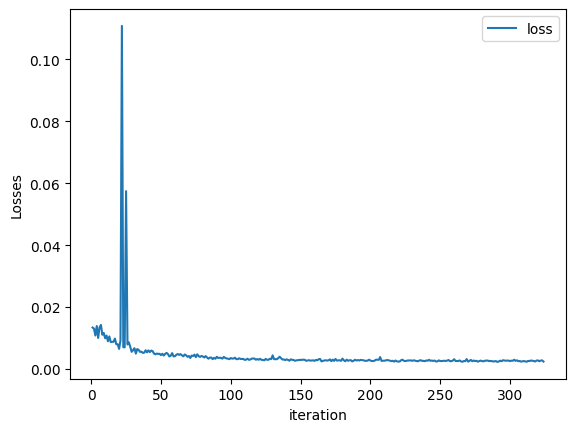

The training loss is 0.002417307853916338
The test loss is 1.4995649129748683
The weights are [[ 2.05621863]
 [-0.25369609]
 [ 0.0402488 ]
 [ 0.63408472]
 [-0.59492813]
 [ 0.01564231]
 [ 0.01687338]
 [ 0.04462132]
 [ 0.0832488 ]]


In [122]:
np.random.seed(42)
w_mini, loss = mini_batch_lin_grad_descent(X_transform, y_train, eta = 0.0001, initial_w =np.random.randn(new_p,1), epsilon = 0.001, batch_size = 100)
# print( sc.transform(X_test).shape)
# print( np.ones((X_test.shape[0], 1)).shape)
pred_y_test = np.hstack((np.ones((X_test.shape[0], 1)), sc.transform(X_test))) @ w_mini
print("The training loss is {}".format(loss))
print("The test loss is {}".format(np.mean(np.square(new_y-pred_y_test))))
print("The weights are {}".format(w_mini))